In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv('../data/housing.tsv', sep='\t', header=None)
df.columns = ['longitude', 'latitude', 'housingMedianAge', 'totalRooms', 
              'totalBedrooms', 'population', 'households', 'medianIncome',
              'oceanProximity', 'medianHouseValue']

print(df.info())
print("\nFirst few rows:")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   longitude         20433 non-null  float64
 1   latitude          20433 non-null  float64
 2   housingMedianAge  20433 non-null  int64  
 3   totalRooms        20433 non-null  int64  
 4   totalBedrooms     20433 non-null  int64  
 5   population        20433 non-null  int64  
 6   households        20433 non-null  int64  
 7   medianIncome      20433 non-null  float64
 8   oceanProximity    20433 non-null  int64  
 9   medianHouseValue  20433 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 1.6 MB
None

First few rows:
   longitude  latitude  housingMedianAge  totalRooms  totalBedrooms  \
0    -122.23     37.88                41         880            129   
1    -122.22     37.86                21        7099           1106   
2    -122.24     37.85                52  

In [6]:
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
          longitude      latitude  housingMedianAge    totalRooms  \
count  20433.000000  20433.000000      20433.000000  20433.000000   
mean    -119.570689     35.633221         28.633094   2636.504233   
std        2.003578      2.136348         12.591805   2185.269567   
min     -124.350000     32.540000          1.000000      2.000000   
25%     -121.800000     33.930000         18.000000   1450.000000   
50%     -118.490000     34.260000         29.000000   2127.000000   
75%     -118.010000     37.720000         37.000000   3143.000000   
max     -114.310000     41.950000         52.000000  39320.000000   

       totalBedrooms    population    households  medianIncome  \
count   20433.000000  20433.000000  20433.000000  20433.000000   
mean      537.870553   1424.946949    499.433465      3.871162   
std       421.385070   1133.208490    382.299226      1.899291   
min         1.000000      3.000000      1.000000      0.499900   
25%       296.000000    787

In [7]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
longitude           0
latitude            0
housingMedianAge    0
totalRooms          0
totalBedrooms       0
population          0
households          0
medianIncome        0
oceanProximity      0
medianHouseValue    0
dtype: int64


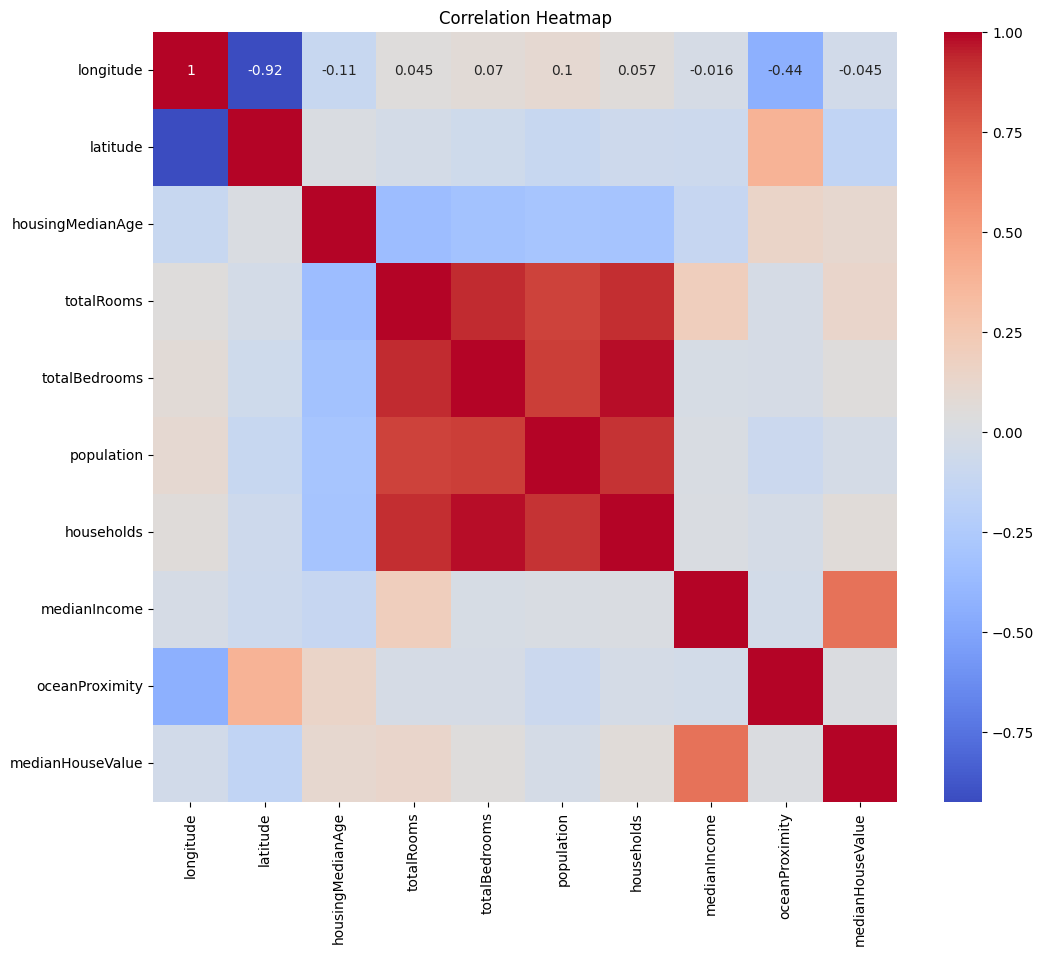

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


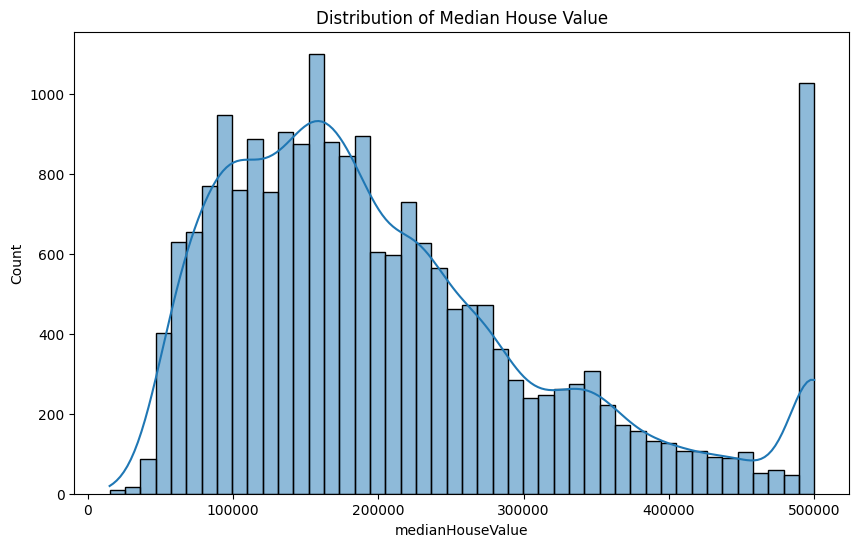

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['medianHouseValue'], kde=True)
plt.title('Distribution of Median House Value')
plt.show()

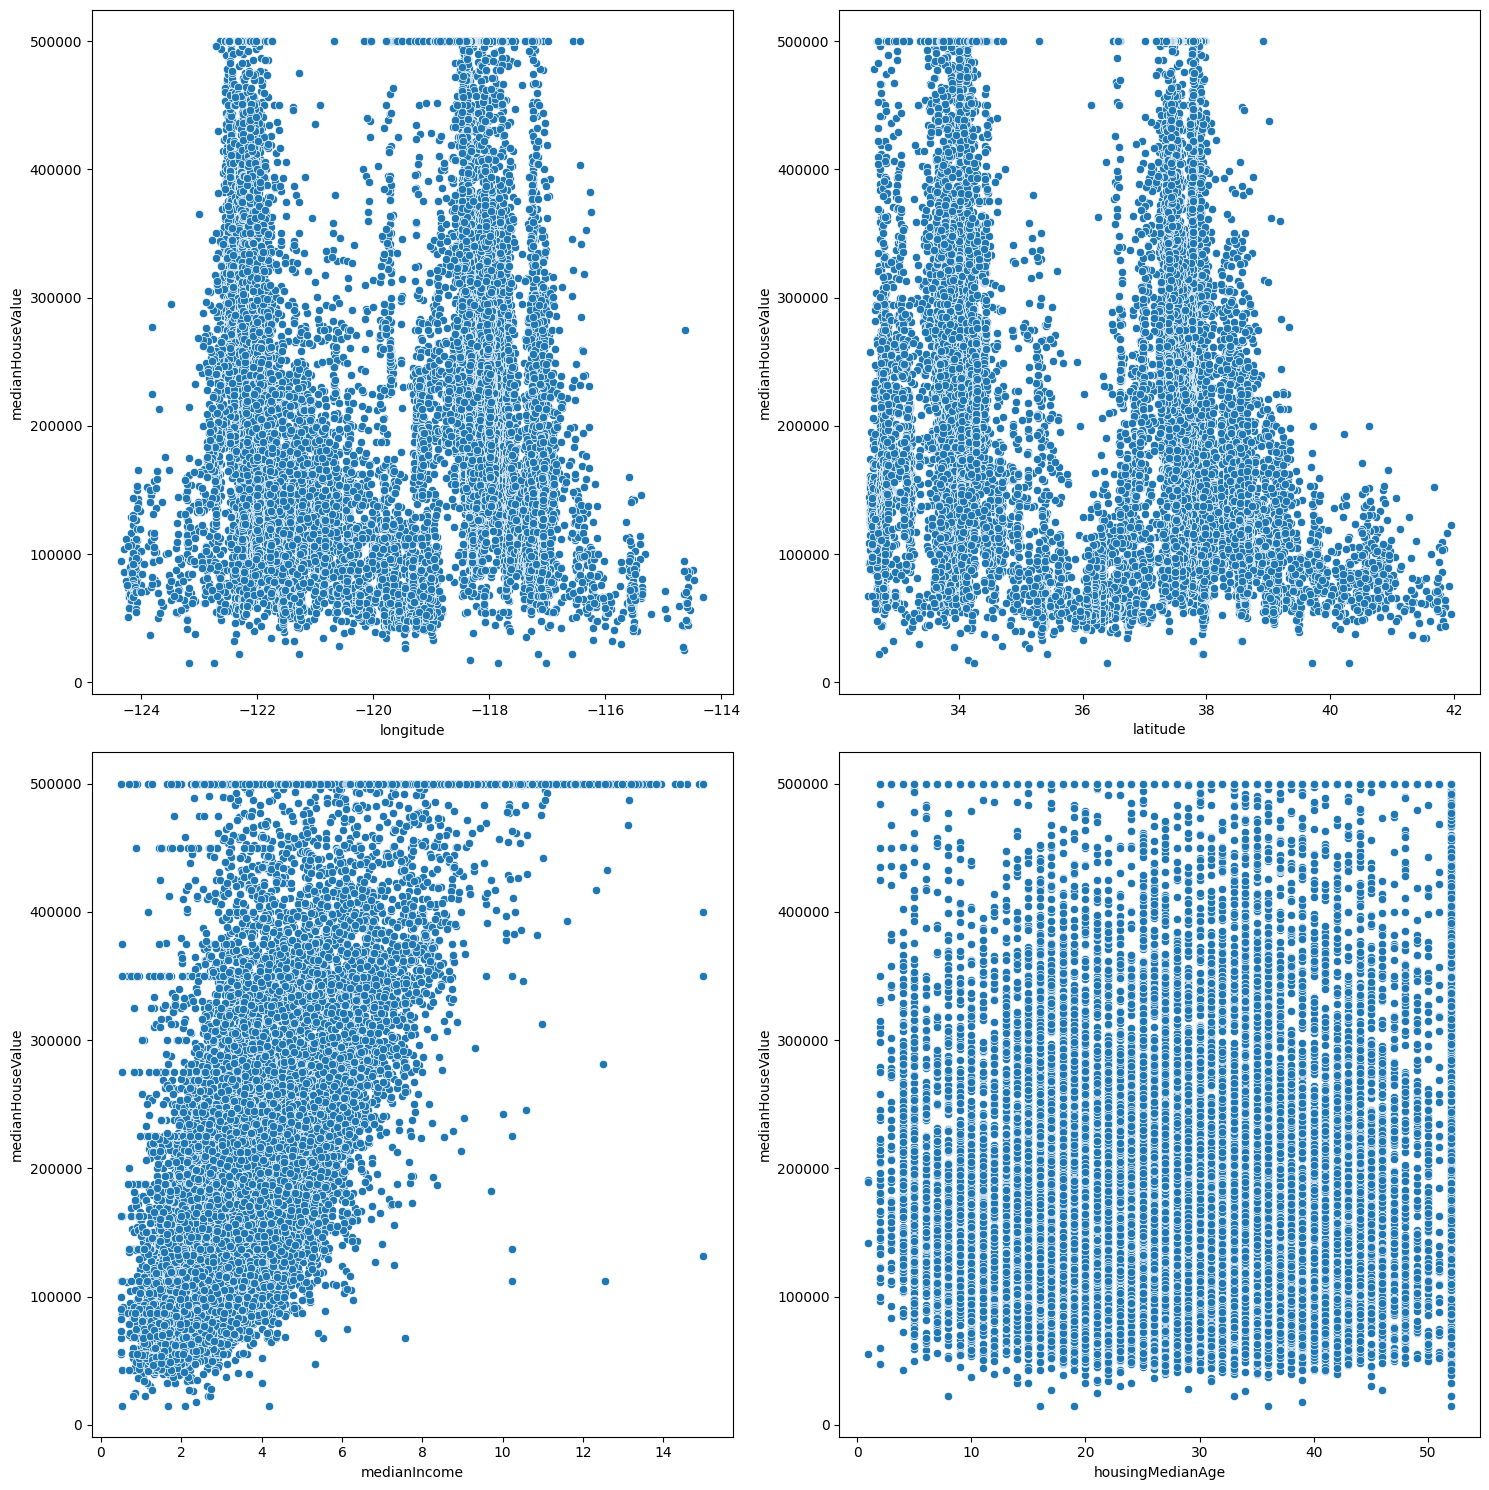

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
sns.scatterplot(data=df, x='longitude', y='medianHouseValue', ax=axes[0, 0])
sns.scatterplot(data=df, x='latitude', y='medianHouseValue', ax=axes[0, 1])
sns.scatterplot(data=df, x='medianIncome', y='medianHouseValue', ax=axes[1, 0])
sns.scatterplot(data=df, x='housingMedianAge', y='medianHouseValue', ax=axes[1, 1])
plt.tight_layout()
plt.show()

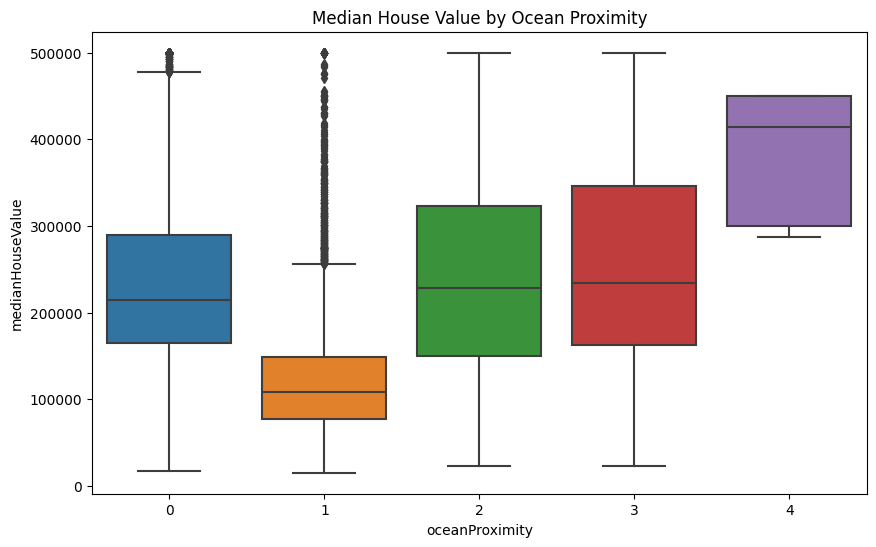

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='oceanProximity', y='medianHouseValue', data=df)
plt.title('Median House Value by Ocean Proximity')
plt.show()

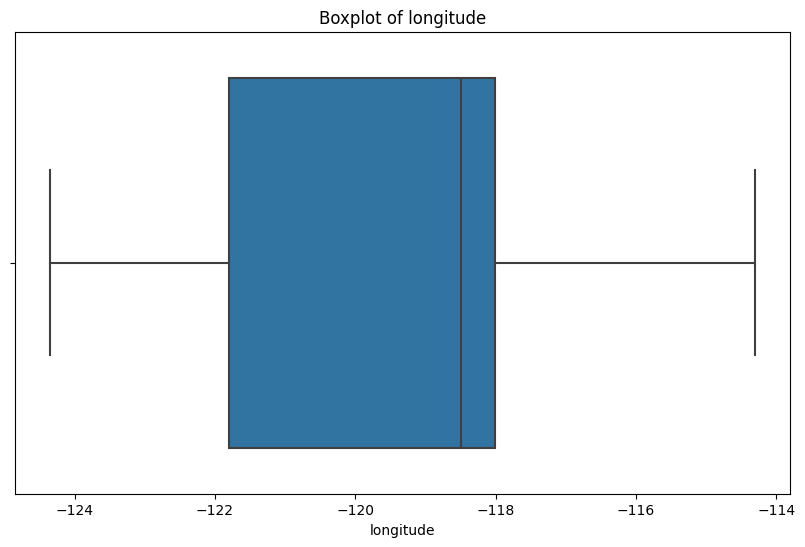

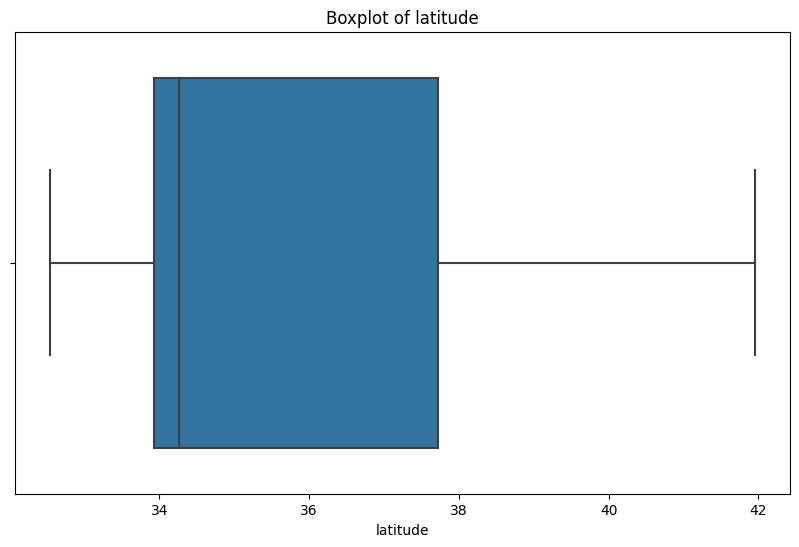

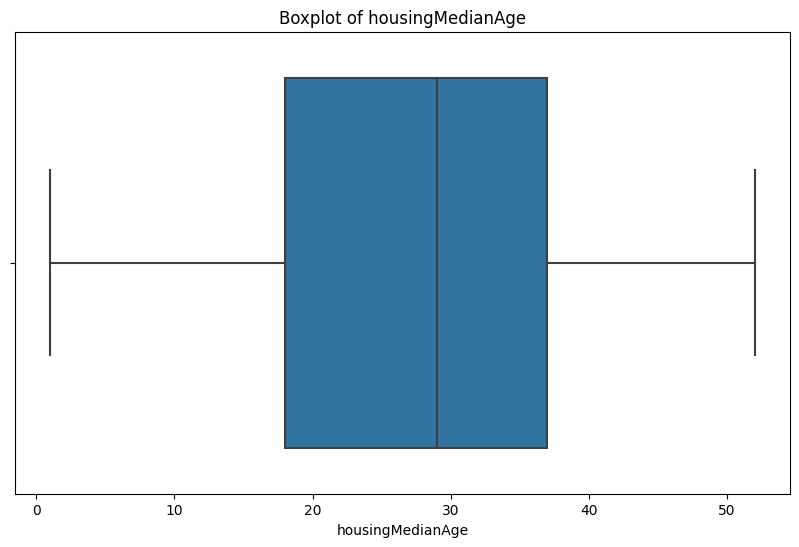

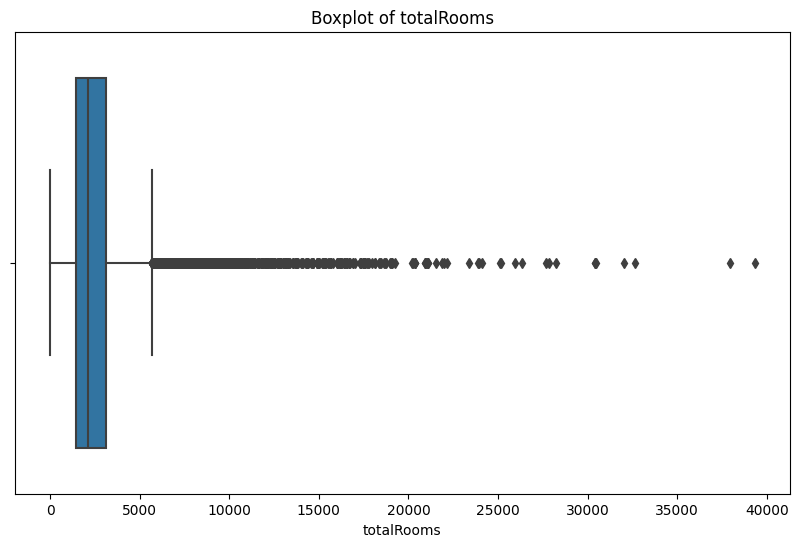

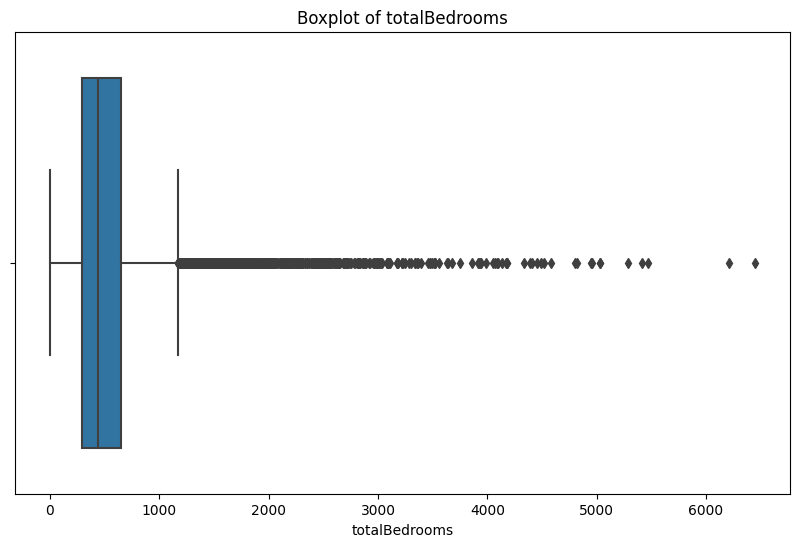

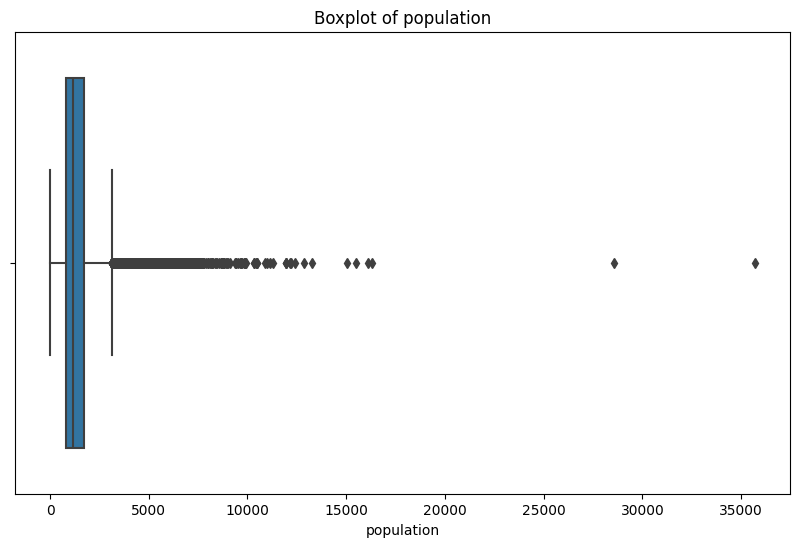

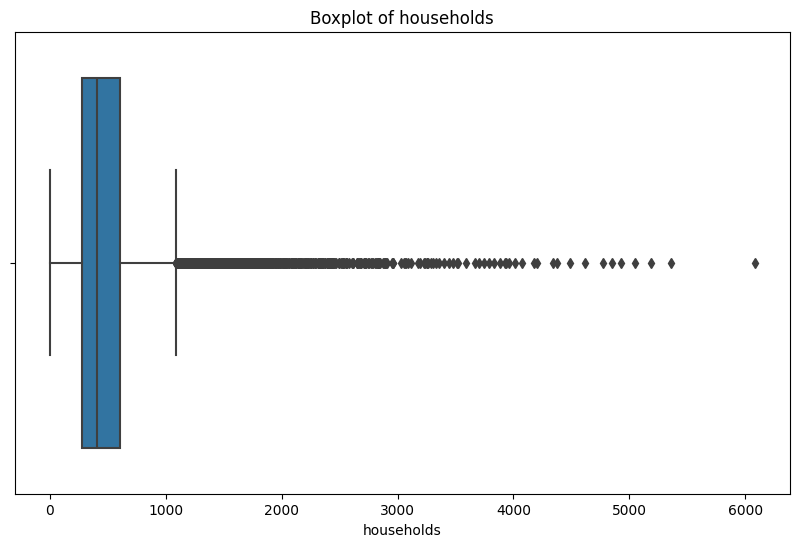

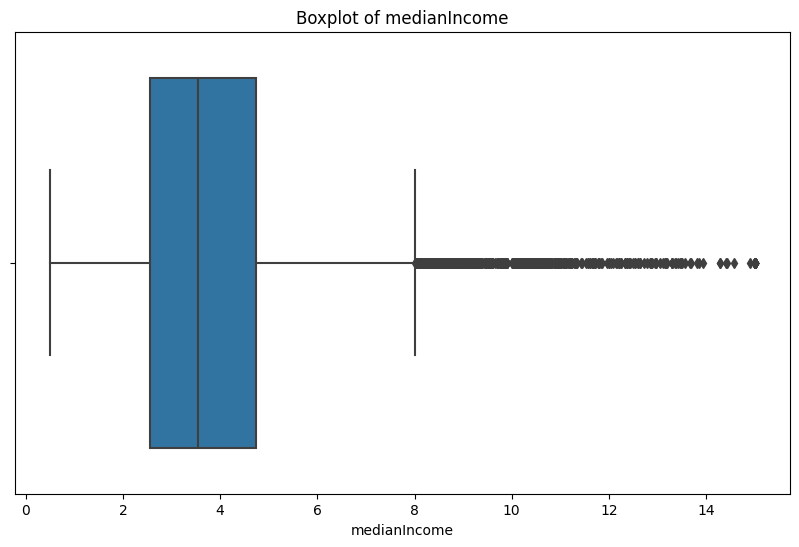

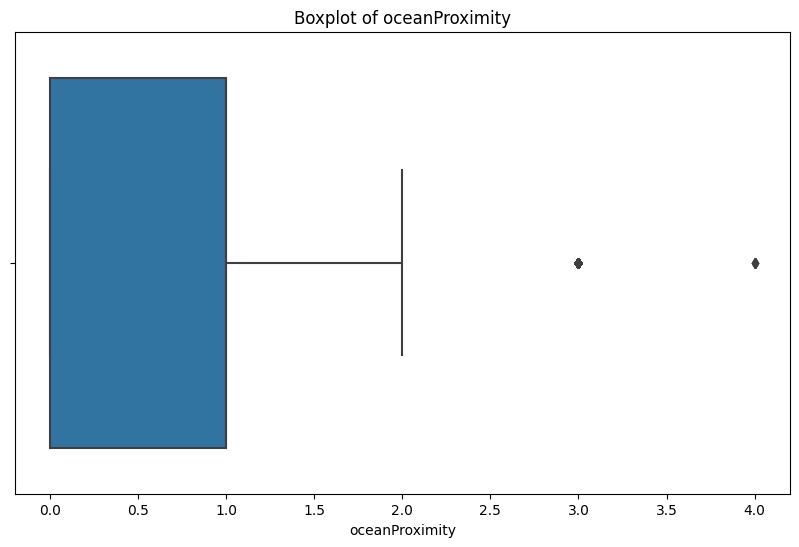

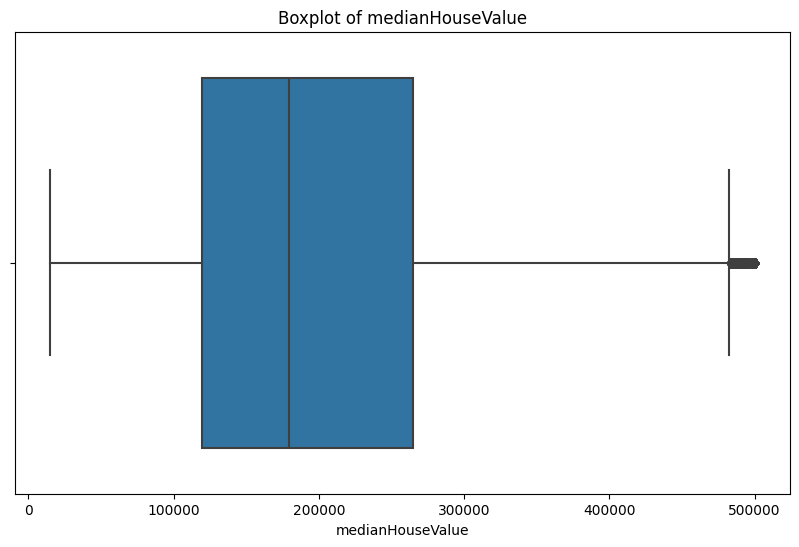

In [12]:
def plot_boxplot(df, feature):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

for feature in df.columns:
    plot_boxplot(df, feature)

In [13]:
df['roomsPerHousehold'] = df['totalRooms'] / df['households']
df['bedroomsPerRoom'] = df['totalBedrooms'] / df['totalRooms']
df['populationPerHousehold'] = df['population'] / df['households']

features = ['longitude', 'latitude', 'housingMedianAge', 'totalRooms', 
            'totalBedrooms', 'population', 'households', 'medianIncome',
            'oceanProximity', 'roomsPerHousehold', 'bedroomsPerRoom', 
            'populationPerHousehold']

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

print("\nDataset after preprocessing:")
print(df.head())


Dataset after preprocessing:
   longitude  latitude  housingMedianAge  totalRooms  totalBedrooms  \
0  -1.327314  1.051717          0.982163   -0.803813      -0.970325   
1  -1.322323  1.042355         -0.606210    2.042130       1.348276   
2  -1.332305  1.037674          1.855769   -0.535189      -0.825561   
3  -1.337296  1.037674          1.855769   -0.623510      -0.718768   
4  -1.337296  1.037674          1.855769   -0.461970      -0.611974   

   population  households  medianIncome  oceanProximity  medianHouseValue  \
0   -0.973320   -0.976833      2.345163        2.081122            452600   
1    0.861339    1.670373      2.332632        2.081122            358500   
2   -0.819769   -0.843427      1.782939        2.081122            352100   
3   -0.765056   -0.733562      0.932970        2.081122            341300   
4   -0.758879   -0.628930     -0.013143        2.081122            342200   

   roomsPerHousehold  bedroomsPerRoom  populationPerHousehold  
0           0.62

In [14]:
X = df[features]
y = df['medianHouseValue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (14303, 12)
Test set shape: (6130, 12)
